A fórmula usada é: $$ \text{valor_normalizado} = \frac{\text{valor} - \text{min}}{\text{max} - \text{min}} \times (\text{beta} - \text{alpha}) + \text{alpha} $$

min = valor mínimo dos dados originais;
max = valor máximo dos dados originais;
alpha= limite inferior do novo intervalo (0, no caso);
beta = limite superior do novo intervalo (255, no caso);


In [ ]:
# Criar uma matriz de exemplo (com valores negativos e positivos)
matriz = np.array([[-50, 0, 50], [100, 150, 75]], dtype=np.float32)

# Normalizar a matriz para o intervalo [0, 255]
matriz_normalizada = cv2.normalize(matriz, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Exibir os valores originais e normalizados
print("Matriz Original:")
print(matriz)

print("\nMatriz Normalizada:")
print(matriz_normalizada)


Matriz Original:
[[-50.   0.  50.]
 [100. 150.  75.]]

Matriz Normalizada:
[[  0  64 128]
 [191 255 159]]


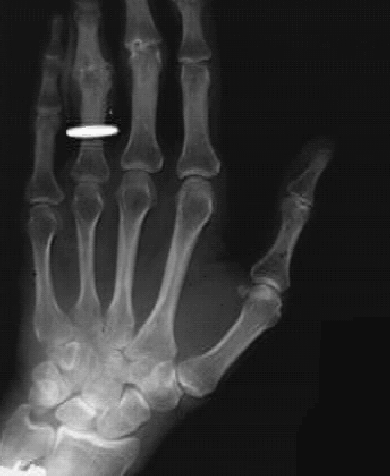

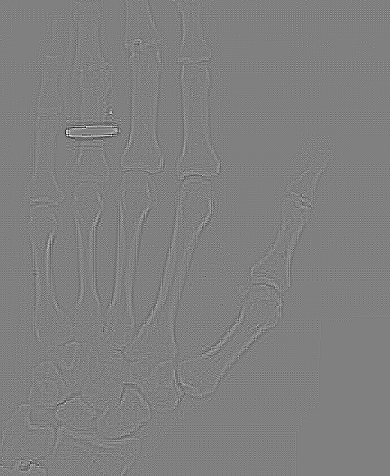

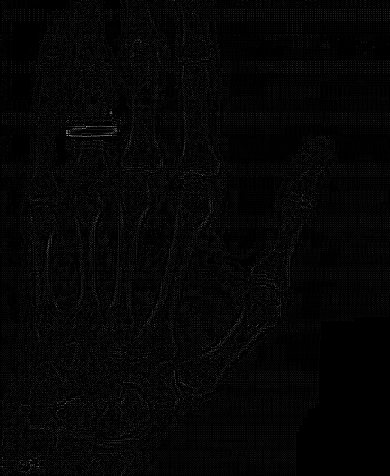

In [ ]:
import cv2
import numpy as np
# Import the necessary patch from google.colab.patches
from google.colab.patches import cv2_imshow

# Carregar a imagem em tons de cinza
imagem = cv2.imread('FigP0436(left)(hand_xray).tif', cv2.IMREAD_GRAYSCALE)

# Criar um kernel para convolução (por exemplo, um filtro Laplaciano)
kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])

# Aplicar a convolução
imagem_convoluida = cv2.filter2D(imagem, ddepth=cv2.CV_32F, kernel=kernel)

# Normalizar os valores para o intervalo 0-255
imagem_normalizada1 = cv2.normalize(imagem_convoluida, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
imagem_normalizada = np.uint8(imagem_normalizada1)  # Converter para uint8 para visualização

# Mostrar as imagens using cv2_imshow instead of cv2.imshow
cv2_imshow(imagem) # Display the original image
cv2_imshow(imagem_normalizada) # Display the normalized image
cv2_imshow(imagem_convoluida) # Display the normalized image


cv2.waitKey(0)
cv2.destroyAllWindows()

1. Usar ddepth=cv2.CV_32F para permitir resultados negativos durante a convolução.
2. Normalização: A função cv2.normalize ajusta os valores da imagem convoluída para o intervalo de 0 a 255.
3. Conversão: Após normalizar, converter para uint8 (padrao do cv2) para que a imagem possa ser exibida usando o OpenCV.

In [ ]:
imagem_convoluida

array([[ -4.,  -4.,   2., ...,   8.,  -6.,   0.],
       [  6.,   8.,  -7., ...,  -8.,   8.,  -4.],
       [ -6., -13.,  24., ...,   8.,  -6.,   0.],
       ...,
       [ -5.,  -5.,  -2., ...,   0.,   0.,   0.],
       [ -1.,   1., -13., ...,   0.,   0.,   0.],
       [  0.,   2., -10., ...,   0.,   0.,   0.]], dtype=float32)

In [ ]:
imagem_normalizada1

array([[125.04807 , 125.04807 , 129.95192 , ..., 134.85577 , 123.41346 ,
        128.3173  ],
       [133.22115 , 134.85577 , 122.59615 , ..., 121.77885 , 134.85577 ,
        125.04807 ],
       [123.41346 , 117.69231 , 147.9327  , ..., 134.85577 , 123.41346 ,
        128.3173  ],
       ...,
       [124.23077 , 124.23077 , 126.68269 , ..., 128.3173  , 128.3173  ,
        128.3173  ],
       [127.5     , 129.13461 , 117.69231 , ..., 128.3173  , 128.3173  ,
        128.3173  ],
       [128.3173  , 129.95192 , 120.144226, ..., 128.3173  , 128.3173  ,
        128.3173  ]], dtype=float32)

array([[125, 125, 129, ..., 134, 123, 128],
       [133, 134, 122, ..., 121, 134, 125],
       [123, 117, 147, ..., 134, 123, 128],
       ...,
       [124, 124, 126, ..., 128, 128, 128],
       [127, 129, 117, ..., 128, 128, 128],
       [128, 129, 120, ..., 128, 128, 128]], dtype=uint8)
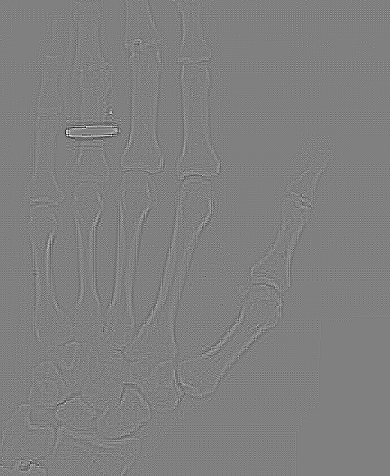

In [ ]:
imagem_normalizada

In [ ]:
imagem_convoluida.max()

np.float32(155.0)

In [ ]:
imagem_convoluida.min()

np.float32(-157.0)

In [ ]:
#peganfo o primeiro pixel da imagem resultado da convolucao:
imagem_convoluida[0,0]

np.float32(-4.0)

In [ ]:
#calculando qual cor vai ter na escala (0, 255)

In [ ]:
((imagem_convoluida[0,0] - imagem_convoluida.min())/(imagem_convoluida.max() - imagem_convoluida.min()))*(255-0)

np.float32(125.04807)

In [ ]:
#o pixel acima resultou num tom de cinza médio para melhor vizualização da filtragem

Intervalo de valores: Durante o processamento, os valores resultantes podem ser negativos ou muito baixos em áreas uniformes. Para exibir a imagem, esses valores são ajustados para um intervalo visualizável (0 a 255). O valor zero geralmente é exibido como cinza médio.